# Pandas  



Pandas — это библиотека на Python, предназначенная для обработки и анализа структурированных табличных данных.

Работа с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня.  

Возможности библиотеки
- быстрый и эффективный объект DataFrame для манипуляции над данными со
встроенной индексацией
- возможность одновременной обработки данных из разных файлов
- возможность загрузки и обработки данных различных форматов: csv, текстовые
файлы, Microsoft Excel, БД SQL и т.д.
- готовые методы для различных манипуляций с таблицами: добавление,
удаление, модификация, агрегирование данных
- готовые методы для операций с пропущенными значениями, выявление и
устранение «проблемных» данных

Благодаря такому богатому функционалу, эффективности и удобству использования, Pandas — один из наиболее популярных инструментов в области анализа данных.  

Установка: `pip install pandas`

In [6]:
# Импорт библиотек
import numpy as np
import pandas as pd

## Структуры данных  

Pandas оперирует двумя структурами храниения данных **Series** и **DataFrame**.

**Series** представляет собой одномерную структуру, которую можно представить как таблицу с одним столбцом.

**DataFrame** – двумерная структура – полноценная таблица с множеством строк и столбцов.

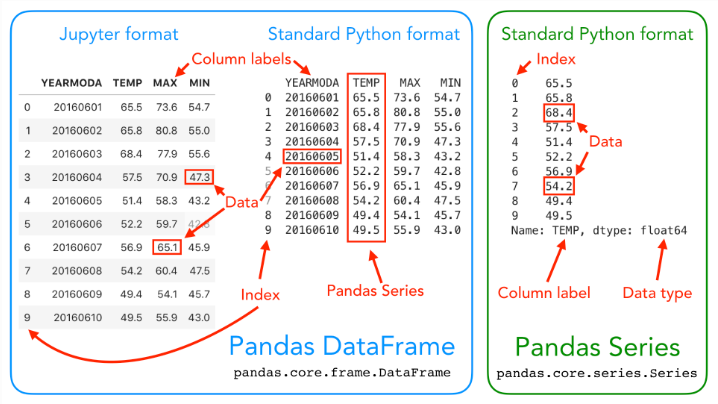

**Series**

In [9]:
data = np.arange(5)
index = ["a", "b", "c", "d", "e"]
series = pd.Series(data=data, index=index)
print(series)

a    0
b    1
c    2
d    3
e    4
dtype: int64


У серии индекс находится слева, а сам элемент - справа. Если индекс явно не
задан, то pandas автоматически задает RangeIndex от 0 до N-1, где N - общее количество элементов. Также стоит обратить внимание, что у Series есть тип хранимых элементов, в нашем случае это int64, т.к. мы передали целочисленные значения.

In [10]:
# Создание из словаря
data = {"b": 1, "a": 0, "c": 2}
print(pd.Series(data))

b    1
a    0
c    2
dtype: int64


In [11]:
# Создание с использоваием константы
data = 5
print(pd.Series(data, index=np.arange(5)))

0    5
1    5
2    5
3    5
4    5
dtype: int64


In [12]:
# Работа с элементами Series
series['b'], series.b, series.get('m')

(1, 1, None)

In [14]:
# метод loc используется для доступа к элементу по строковой метке
# метод iloc используется для доступа по индексу (начиная от 0), i-индекс
series.loc['a'], series.iloc[1]

(0, 1)

In [13]:
# Испозование срезов
series[:3]

,0
a,0
b,1
c,2


In [15]:
# Для фильтрации и валидации можно использовать условные выражения
series[series >= 3]

,0
d,3
e,4


In [16]:
# именование индексов и именование значений
series.name = 'numbers'
series.index.name = 'letters'
print(series)

letters
a    0
b    1
c    2
d    3
e    4
Name: numbers, dtype: int64


**DataFrame**

DataFrame можно создать разными способами. Из словаря списков, словаря серий, двумерного массива ndarray и т.д.  
Ссылка на user guide: https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe

In [17]:
data = {
    "student": ["Студент_1", "Студент_2", "Студент_3"],
    "math": [5, 3, 4],
    "physics": [4, 5, 5]
}

students = pd.DataFrame(data)
print(students)

     student  math  physics
0  Студент_1     5        4
1  Студент_2     3        5
2  Студент_3     4        5


In [18]:
data = [["Студент_1", 5, 4],["Студент_2", 3, 5], ["Студент_3", 4, 5]]
columns = ["student", "math", "physics"]

students = pd.DataFrame(data=data, columns=columns)
print(students)

     student  math  physics
0  Студент_1     5        4
1  Студент_2     3        5
2  Студент_3     4        5


In [19]:
print(students.index)
print(students.columns)

RangeIndex(start=0, stop=3, step=1)
Index(['student', 'math', 'physics'], dtype='object')


Для индекса по строке по умолчанию задаётся числовое значение. Значения индекса можно заменить путём записи списка в атрибут index:

In [20]:
students.index = ["A", "B", "C"]
print(students)

     student  math  physics
A  Студент_1     5        4
B  Студент_2     3        5
C  Студент_3     4        5


Работа с элементами в DataFrame:

| Операция                        | Синтаксис     | Возвращаемый результат |
|---------------------------------|---------------|------------------------|
| Выбор столбца                   | df[col]       | Series                 |
| Выбор строки по метке           | df.loc[label] | Series                 |
| Выбор строки по индексу         | df.iloc[loc]  | Series                 |
| Слайс по строкам                | df[0:4]       | DataFrame              |
| Выбор строк, отвечающих условию | df[bool_vec]  | DataFrame              |

In [21]:
# с помощью loc метода можно обратиться к строкам по метке не целиком, а к конкретным столбцам
students.loc[['A', 'B'], 'math']

,math
A,5
B,3


In [22]:
students.iloc[[0, 1], [1]]

,math
A,5
B,3


In [23]:
# Обращение к конкретной ячейки данных
students.at['A', 'student']

'Студент_1'

In [24]:
# столбец и строка — это объекты Series
print(students['student'])
print(type(students['student']))

A    Студент_1
B    Студент_2
C    Студент_3
Name: student, dtype: object
<class 'pandas.core.series.Series'>


In [25]:
print(students.iloc[0])
print(type(students.iloc[0]))

student    Студент_1
math               5
physics            4
Name: A, dtype: object
<class 'pandas.core.series.Series'>


## Импорт данных

Таким образом мы можем сами генерировать сруктуры данных для создания датасета. Но часто необходимо проанализировать данные из входного файла.

Поддержка чтения файлов разных форматов:  
CSV: используется функция read_csv()  
Excel: используется функция read_excel()  
JSON: спользуется функция read_json()

Загрузим данные об оценках студентов  
Ссылка на сам датасет: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [76]:
url = 'https://raw.githubusercontent.com/rashida048/Datasets/refs/heads/master/StudentsPerformance.csv'
df = pd.read_csv(url, sep = ',')

## Общее представление о данных

Первые несколько строк датафрейма можно получить с помощью метода .head(), а последние — .tail()

In [29]:
# В качесвте аргумента передается количесвто строк, которое необходимом вывести (по умолчанию 5)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [30]:
df.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [31]:
df[100:105]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
100,male,group B,some college,standard,none,79,67,67
101,male,group D,bachelor's degree,standard,completed,68,74,74
102,female,group D,associate's degree,standard,none,85,91,89
103,male,group B,high school,standard,completed,60,44,47
104,male,group C,some college,standard,completed,98,86,90


In [32]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [33]:
# convert_dtypes() позволяет автоматически подобрать наиболее эффективные представления
df.convert_dtypes().dtypes

,0
gender,string[python]
race/ethnicity,string[python]
parental level of education,string[python]
lunch,string[python]
test preparation course,string[python]
math score,Int64
reading score,Int64
writing score,Int64


In [34]:
# .info() кроме типов позволяет увидеть количество строк, столбцов, столбцы с отсутствующими значениями
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
# статистика по фрейму
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Фильтрация данных

In [36]:
# Условия фильтрации данных можно использовать в качестве индекса
df[df["test preparation course"] == "completed"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65


In [37]:
df[(df["math score"] > 65) & (df["reading score"] < 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
13,male,group A,some college,standard,completed,78,72,70
15,female,group C,some high school,standard,none,69,75,78
...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76
989,female,group D,some college,free/reduced,completed,67,86,83
990,male,group E,high school,free/reduced,completed,86,81,75
998,female,group D,some college,standard,completed,68,78,77


## Основные операции

In [38]:
# Сортировка
df.sort_values(["math score"], ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


In [39]:
# Создание нового столбца на основе существующих
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [40]:
# Добавление нового столбца с помощью .assign()
df.assign(total_score=lambda x: x["math score"] + x["reading score"] + x["writing score"])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218
1,female,group C,some college,standard,completed,69,90,88,247,247
2,female,group B,master's degree,standard,none,90,95,93,278,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148
4,male,group C,some college,standard,none,76,78,75,229,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,282
996,male,group C,high school,free/reduced,none,62,55,55,172,172
997,female,group C,high school,free/reduced,completed,59,71,65,195,195
998,female,group D,some college,standard,completed,68,78,77,223,223


Применение функций к столбцам и строкам:

.apply() - применяет пользовательскую функцию к элементам по выбранной оси

In [43]:
import re

def get_total_score(x):
    return x["math score"] + x["reading score"] + x["writing score"]

def delete_group(x: str):
    return re.sub(r"^group\s", "", x)

In [41]:
df['toatal_score_2'] = df.apply(lambda x: sum([x["math score"], x["reading score"], x["writing score"]]), axis=1)
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,toatal_score_2
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218
1,female,group C,some college,standard,completed,69,90,88,247,247
2,female,group B,master's degree,standard,none,90,95,93,278,278


In [44]:
df['total_score_3'] = df.apply(get_total_score, axis=1)
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,toatal_score_2,total_score_3
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,218
1,female,group C,some college,standard,completed,69,90,88,247,247,247
2,female,group B,master's degree,standard,none,90,95,93,278,278,278


In [45]:
df['race/ethnicity'].apply(delete_group).head(3)

,race/ethnicity
0,B
1,C
2,B


In [46]:
# Операции со чтроками через .str
df['race/ethnicity'].str.replace('group B', 'B').head(3)

,race/ethnicity
0,B
1,group C
2,B


In [47]:
df['parental level of education'].str.upper().head(3)

,parental level of education
0,BACHELOR'S DEGREE
1,SOME COLLEGE
2,MASTER'S DEGREE


In [48]:
df['parental level of education'].head(3)

,parental level of education
0,bachelor's degree
1,some college
2,master's degree


In [49]:
# Переименование столбцов
df = df.rename(columns={"total score": "final score"})
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score,toatal_score_2,total_score_3
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,218
1,female,group C,some college,standard,completed,69,90,88,247,247,247
2,female,group B,master's degree,standard,none,90,95,93,278,278,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,148
4,male,group C,some college,standard,none,76,78,75,229,229,229
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,282,282
996,male,group C,high school,free/reduced,none,62,55,55,172,172,172
997,female,group C,high school,free/reduced,completed,59,71,65,195,195,195
998,female,group D,some college,standard,completed,68,78,77,223,223,223


In [50]:
# Удаление строк и столбцов с помощью .drop()
df = df.drop(['final score', 'toatal_score_2', 'total_score_3'], axis=1)
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [51]:
df = df.drop([0, 1])
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Объединение данных

Основные функции объединения данных - merge(), concat() и join().

In [52]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": [1, 2, 3, 4]})
df1

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


In [53]:
df2 = pd.DataFrame({"key": ["B", "D", "E", "F"], "value": [5, 6, 7, 8]})
df2

,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [54]:
pd.merge(df1, df2, on="key", how="inner", suffixes=(None, '_y'))

,key,value,value_y
0,B,2,5
1,D,4,6


In [57]:
pd.concat([df1, df2], axis=0, ignore_index=True)

,key,value
0,A,1
1,B,2
2,C,3
3,D,4
4,B,5
5,D,6
6,E,7
7,F,8


In [59]:
df2.index = [4, 5, 6, 7]

In [60]:
# join() больше подходит для объединения по индексу
df1.join(df2, how="inner", lsuffix="_1", rsuffix="_2")

,key_1,value_1,key_2,value_2


## Группировка и агрегирование

Одна из базовых функций анализа данных - группировка и агрегирование.

В pandas функцию groupby можно комбинировать с одной или несколькими функциями агрегирования.

In [61]:
# Метод .groupby создает сооветсвующий объект группировки
grouped = df.groupby(["gender", "test preparation course"])
grouped

In [62]:
# У grouped свои атрибуты
grouped.groups

{('female', 'completed'): [6, 21, 38, 46, 48, 54, 56, 70, 78, 97, 110, 114, 120, 122, 133, 142, 148, 152, 155, 156, 158, 161, 165, 167, 168, 169, 174, 175, 176, 177, 178, 179, 194, 200, 216, 220, 224, 229, 237, 247, 252, 259, 260, 268, 276, 277, 283, 302, 304, 313, 314, 316, 320, 339, 342, 347, 352, 357, 371, 373, 377, 394, 400, 403, 408, 410, 414, 420, 421, 422, 423, 440, 445, 450, 468, 470, 472, 474, 475, 497, 501, 503, 513, 514, 515, 517, 518, 519, 530, 533, 535, 546, 556, 560, 563, 566, 567, 573, 578, 583, ...], ('female', 'none'): [2, 5, 9, 12, 14, 15, 17, 19, 23, 27, 29, 30, 31, 32, 36, 37, 41, 42, 44, 47, 55, 59, 63, 64, 67, 69, 72, 79, 80, 85, 86, 87, 88, 89, 90, 94, 98, 99, 102, 105, 106, 108, 109, 113, 116, 117, 118, 119, 125, 129, 138, 140, 141, 145, 164, 172, 173, 181, 182, 183, 189, 190, 192, 198, 199, 201, 203, 208, 209, 212, 217, 222, 225, 226, 232, 241, 242, 248, 251, 255, 256, 258, 262, 263, 266, 267, 269, 272, 273, 278, 282, 284, 287, 293, 308, 309, 310, 319, 321, 322

In [65]:
# Для получения сводных данных для сгруппированных значений применим функцию агрегирования .mean()
grouped[["math score", "reading score", "writing score"]].mean()

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.185792      77.306011      78.743169
       none                      61.639640      69.975976      68.966967
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

Для применения функции агрегации к нескольким столбцам подойдёт метод agg(), в который можно передать словарь с ключами — названиями столбцов, а значения по ключам могут быть списками функций агрегации.

In [66]:
agg_functions = {
    "math score": ["mean", "max", "min"],
    "reading score": ["median"],
    "writing score": ["sum"]
}
grouped.agg(agg_functions)

math score          reading score writing score
                                     mean  max min        median           sum
gender test preparation course                                                
female completed                67.185792   99  23          78.0         14410
       none                     61.639640  100   0          71.0         22966
male   completed                72.339080  100  39          71.0         12144
       none                     66.688312   97  27          63.0         18372

## Работа с пропущенными данными

В реальных датасетах часть данных может отсутствовать. В библиотеке Pandas эти пропуски обычно представлены как NaN (Not a Number).
Ключевые методы для работы с такими значениями:

**.isna()** — идентифицирует отсутствующие значения и возвращает булевую маску, где True указывает на пропущенные данные;  
**.fillna()** — позволяет заполнить отсутствующие значения с помощью указанных значений или методов интерполяции;  
**.dropna()** — удаляет строки или столбцы, содержащие отсутствующие значения.

In [67]:
df.isna().head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [68]:
mini_df = pd.DataFrame(dict(age=[5, 6, np.nan],
                       born=[pd.NaT, pd.Timestamp('1939-05-27'), pd.Timestamp('1940-04-25')],
                       name=['Alfred', 'Batman', ''],
                       toy=[None, 'Batmobile', 'Joker']))
mini_df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [69]:
mini_df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [70]:
# Т.к. .isna() возвращает булевую маску, его можно использовать для фильтрации DataFrame
df[df['math score'].isna()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [71]:
df.loc[4, 'test preparation course'], type(df.loc[4, 'test preparation course'])

('none', str)

In [77]:
df['test preparation course'] = df['test preparation course'].replace({'none': np.NaN})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,NaN,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,NaN,47,57,44
4,male,group C,some college,standard,NaN,76,78,75


In [75]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,True,90,95,93
3,male,group A,associate's degree,free/reduced,True,47,57,44
4,male,group C,some college,standard,True,76,78,75
5,female,group B,associate's degree,standard,True,71,83,78
6,female,group B,some college,standard,False,88,95,92
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,False,88,99,95
996,male,group C,high school,free/reduced,True,62,55,55
997,female,group C,high school,free/reduced,False,59,71,65
998,female,group D,some college,standard,False,68,78,77


In [78]:
df['test preparation course'].fillna('not completed').head()

,test preparation course
0,not completed
1,completed
2,not completed
3,not completed
4,not completed


In [79]:
# удаление всех объектов, которые содержат значения NaN - dropna() без аргументов
df.dropna().head() # удаление записей (строк)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46


## Визуализация данных

Pandas интегрирована с библиотекой Matplotlib. В Pandas можно либо явно использовать её функции для визуализации данных, либо применять встроенные методы, такие как .plot() и .hist().

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

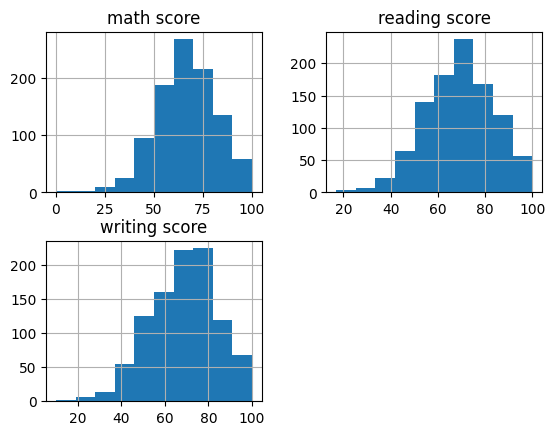

In [81]:
df.hist()

<Axes: title={'center': 'Тест по математике'}, xlabel='Баллы за тест', ylabel='Количесвто студентов'>

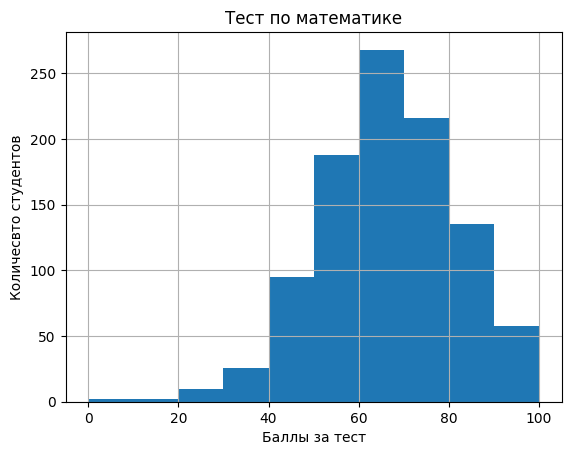

In [80]:
df['math score'].plot(kind='hist', ylabel='Количесвто студентов', xlabel='Баллы за тест', title='Тест по математике', grid=True)

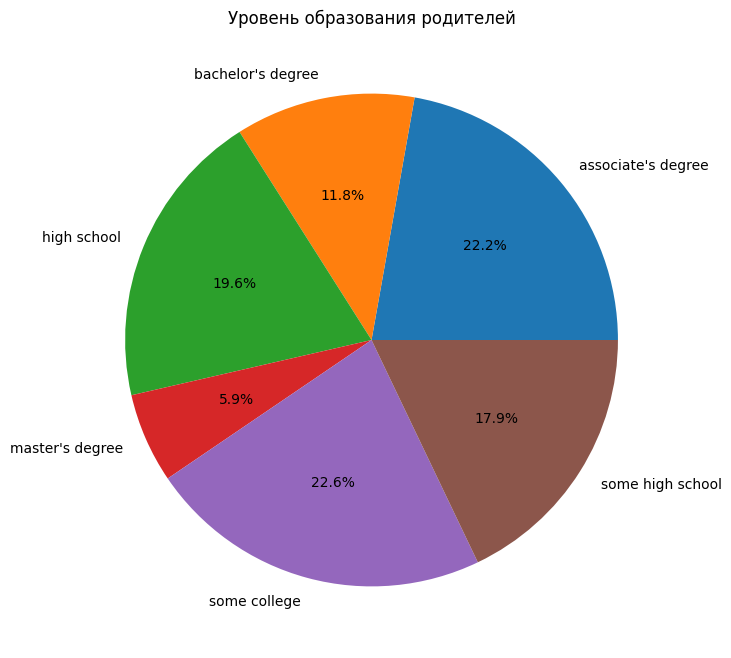

In [82]:
import matplotlib.pyplot as plt

df_grouped = df.groupby(['parental level of education'])['math score'].count()

plt.figure(figsize=(8, 8))
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%')
plt.title('Уровень образования родителей')
plt.show()

## Запись данных в файл

Поддержка записи файлов в разные форматы:  
CSV: используется функция to_csv()  
Excel: используется функция to_excel()  
JSON: спользуется функция to_json()

In [93]:
# Поддерживает разные форматы для сохранения json {'split', 'records', 'index', 'columns', 'values', 'table'}
df.to_json('result.json', orient='records')
result = df.to_json(orient='records')

In [94]:
from json import loads, dumps

parsed = loads(result)[0]
print(dumps(parsed, indent=4))

{
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "bachelor's degree",
    "lunch": "standard",
    "test preparation course": null,
    "math score": 72,
    "reading score": 72,
    "writing score": 74
}


Полезные ссылки:  
https://pandas.pydata.org/docs/index.html  
https://tproger.ru/articles/gajd-po-obrabotke-dannyh-s-pomoshhyu-pandas-chast-pervaya  
https://education.yandex.ru/handbook/python/article/modul-pandas